In [25]:
import math
import warnings

import numpy as numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings(action='ignore') 

# Load Data

In [26]:
# Read the dataset
data = pd.read_csv('sales_data.csv')
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [27]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [ ]:
# Show statistical summary of numerical features
data.describe()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000
mean,301.062842,88.827316,89.090645,67.726028,9.087039,0.328947,69.454029,0.200000,104.317158
std,226.510161,43.994525,162.404627,39.377899,7.475781,0.469834,40.943818,0.400003,46.964801
min,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,4.290000,0.000000,4.000000
25%,136.000000,58.000000,0.000000,31.997500,5.000000,0.000000,32.620000,0.000000,71.000000
50%,227.000000,84.000000,0.000000,64.500000,10.000000,0.000000,65.700000,0.000000,100.000000
75%,408.000000,114.000000,121.000000,95.830000,10.000000,1.000000,97.932500,0.000000,133.000000
max,2267.000000,426.000000,1616.000000,228.030000,25.000000,1.000000,261.220000,1.000000,430.000000


In [ ]:
# Convert 'Date' column to datetime and sort the data
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by=['Store ID', 'Product ID', 'Date'])
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
100,2022-01-02,S001,P0001,Electronics,North,93,71,0,65.63,5,Snowy,0,73.66,Winter,0,84
200,2022-01-03,S001,P0001,Electronics,North,274,142,229,68.55,15,Snowy,1,80.73,Winter,0,132
300,2022-01-04,S001,P0001,Electronics,North,132,42,0,61.66,10,Snowy,0,54.88,Winter,0,67
400,2022-01-05,S001,P0001,Electronics,North,319,129,0,59.56,25,Snowy,1,57.34,Winter,0,110


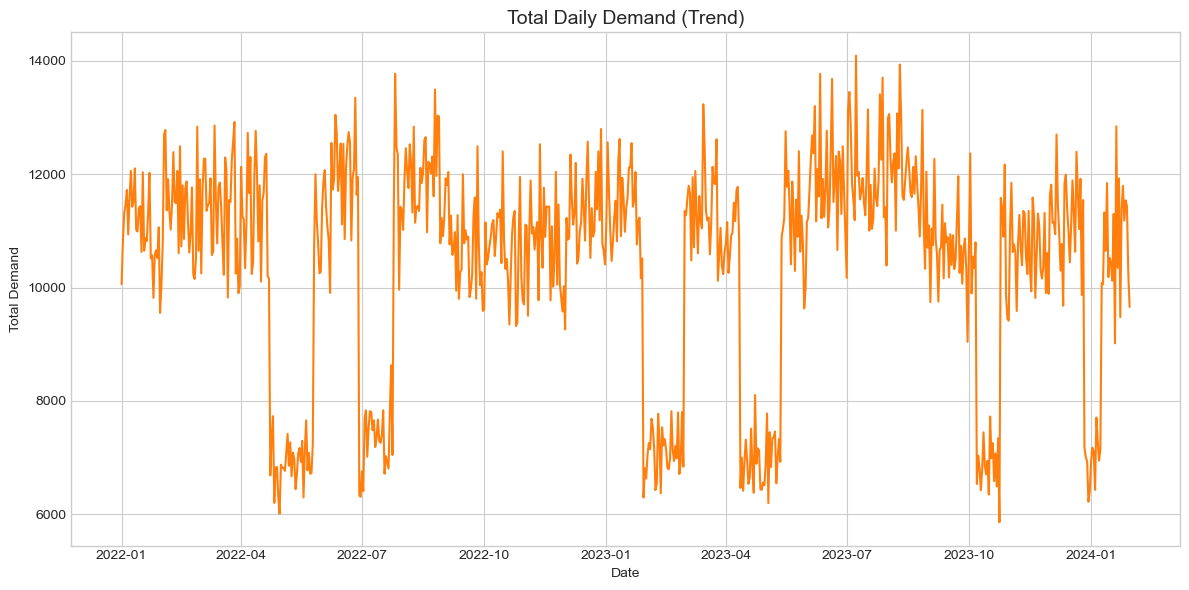

In [37]:
# Visualize numerical feature distributions

daily_demand = data.groupby('Date')['Demand'].sum().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(daily_demand['Date'], daily_demand['Demand'], color='tab:orange')
plt.title('Total Daily Demand (Trend)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Demand')

plt.tight_layout()
plt.show()

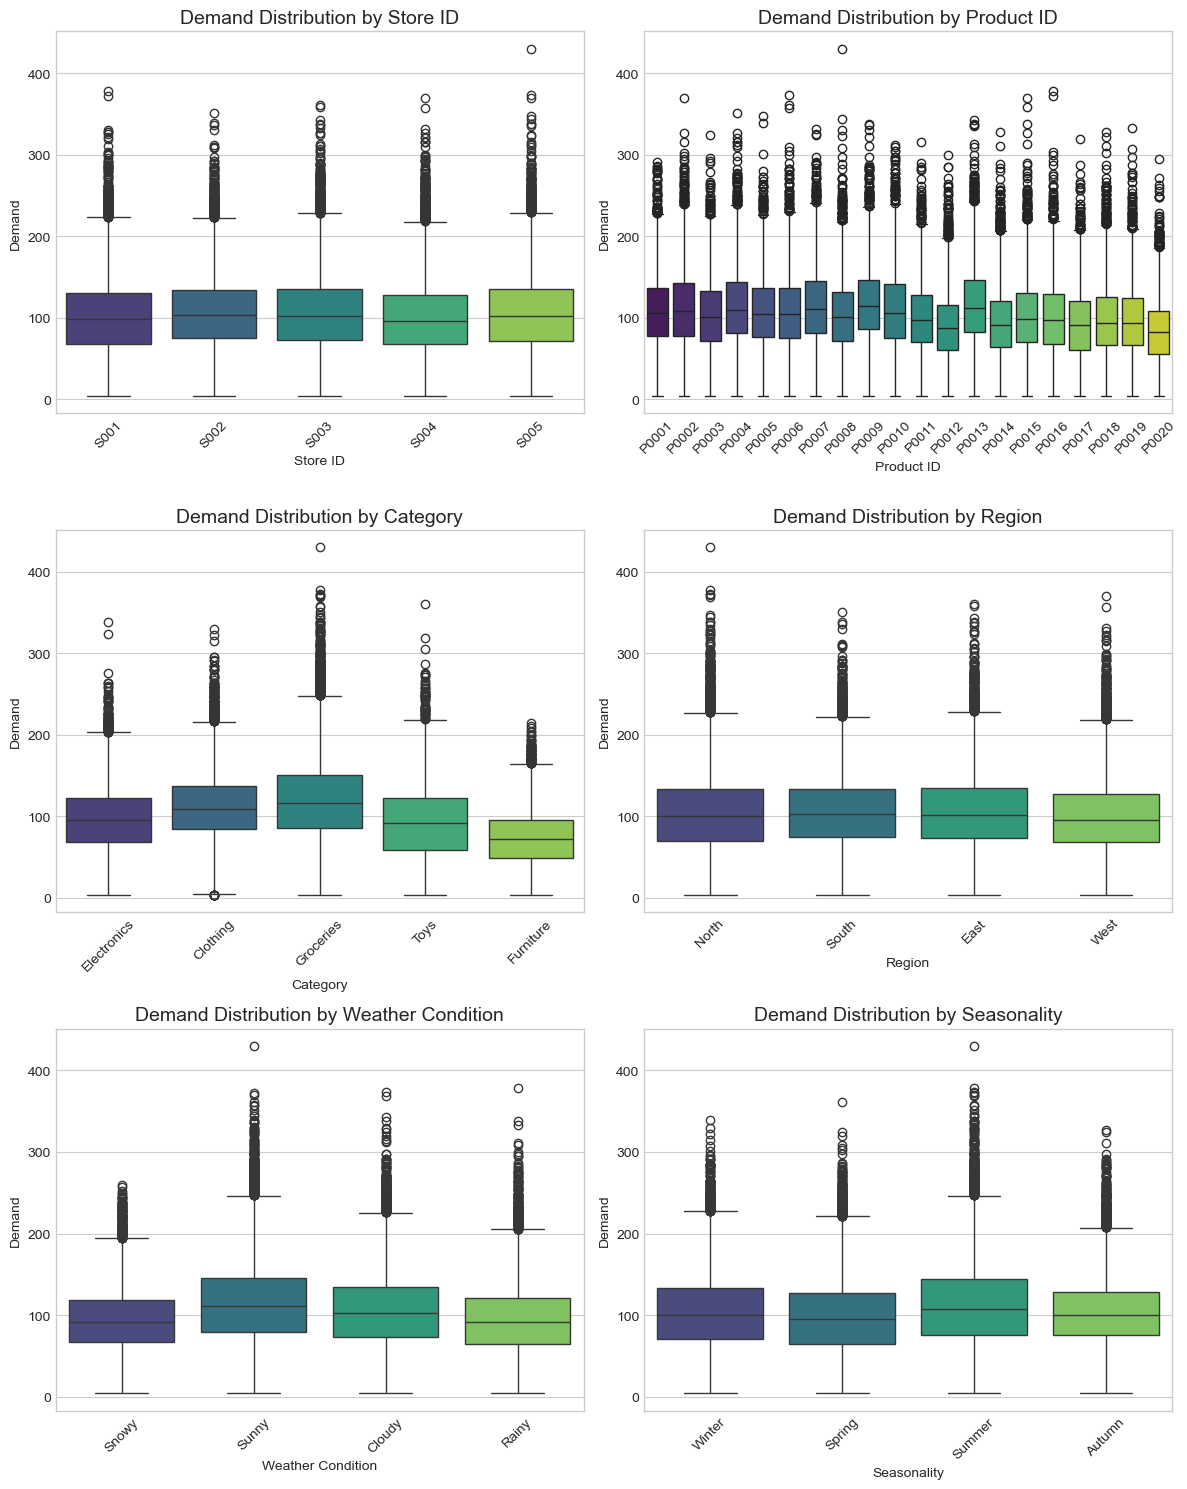

In [ ]:
# Visualize categorical feature distributions with respect to Demand

n_features = data.select_dtypes(include=['object']).columns.tolist()
n_cols = 2
n_rows = math.ceil(len(n_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(n_features):
    sns.boxplot(data=data, x=feature, y='Demand', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Demand Distribution by {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Demand')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
                        

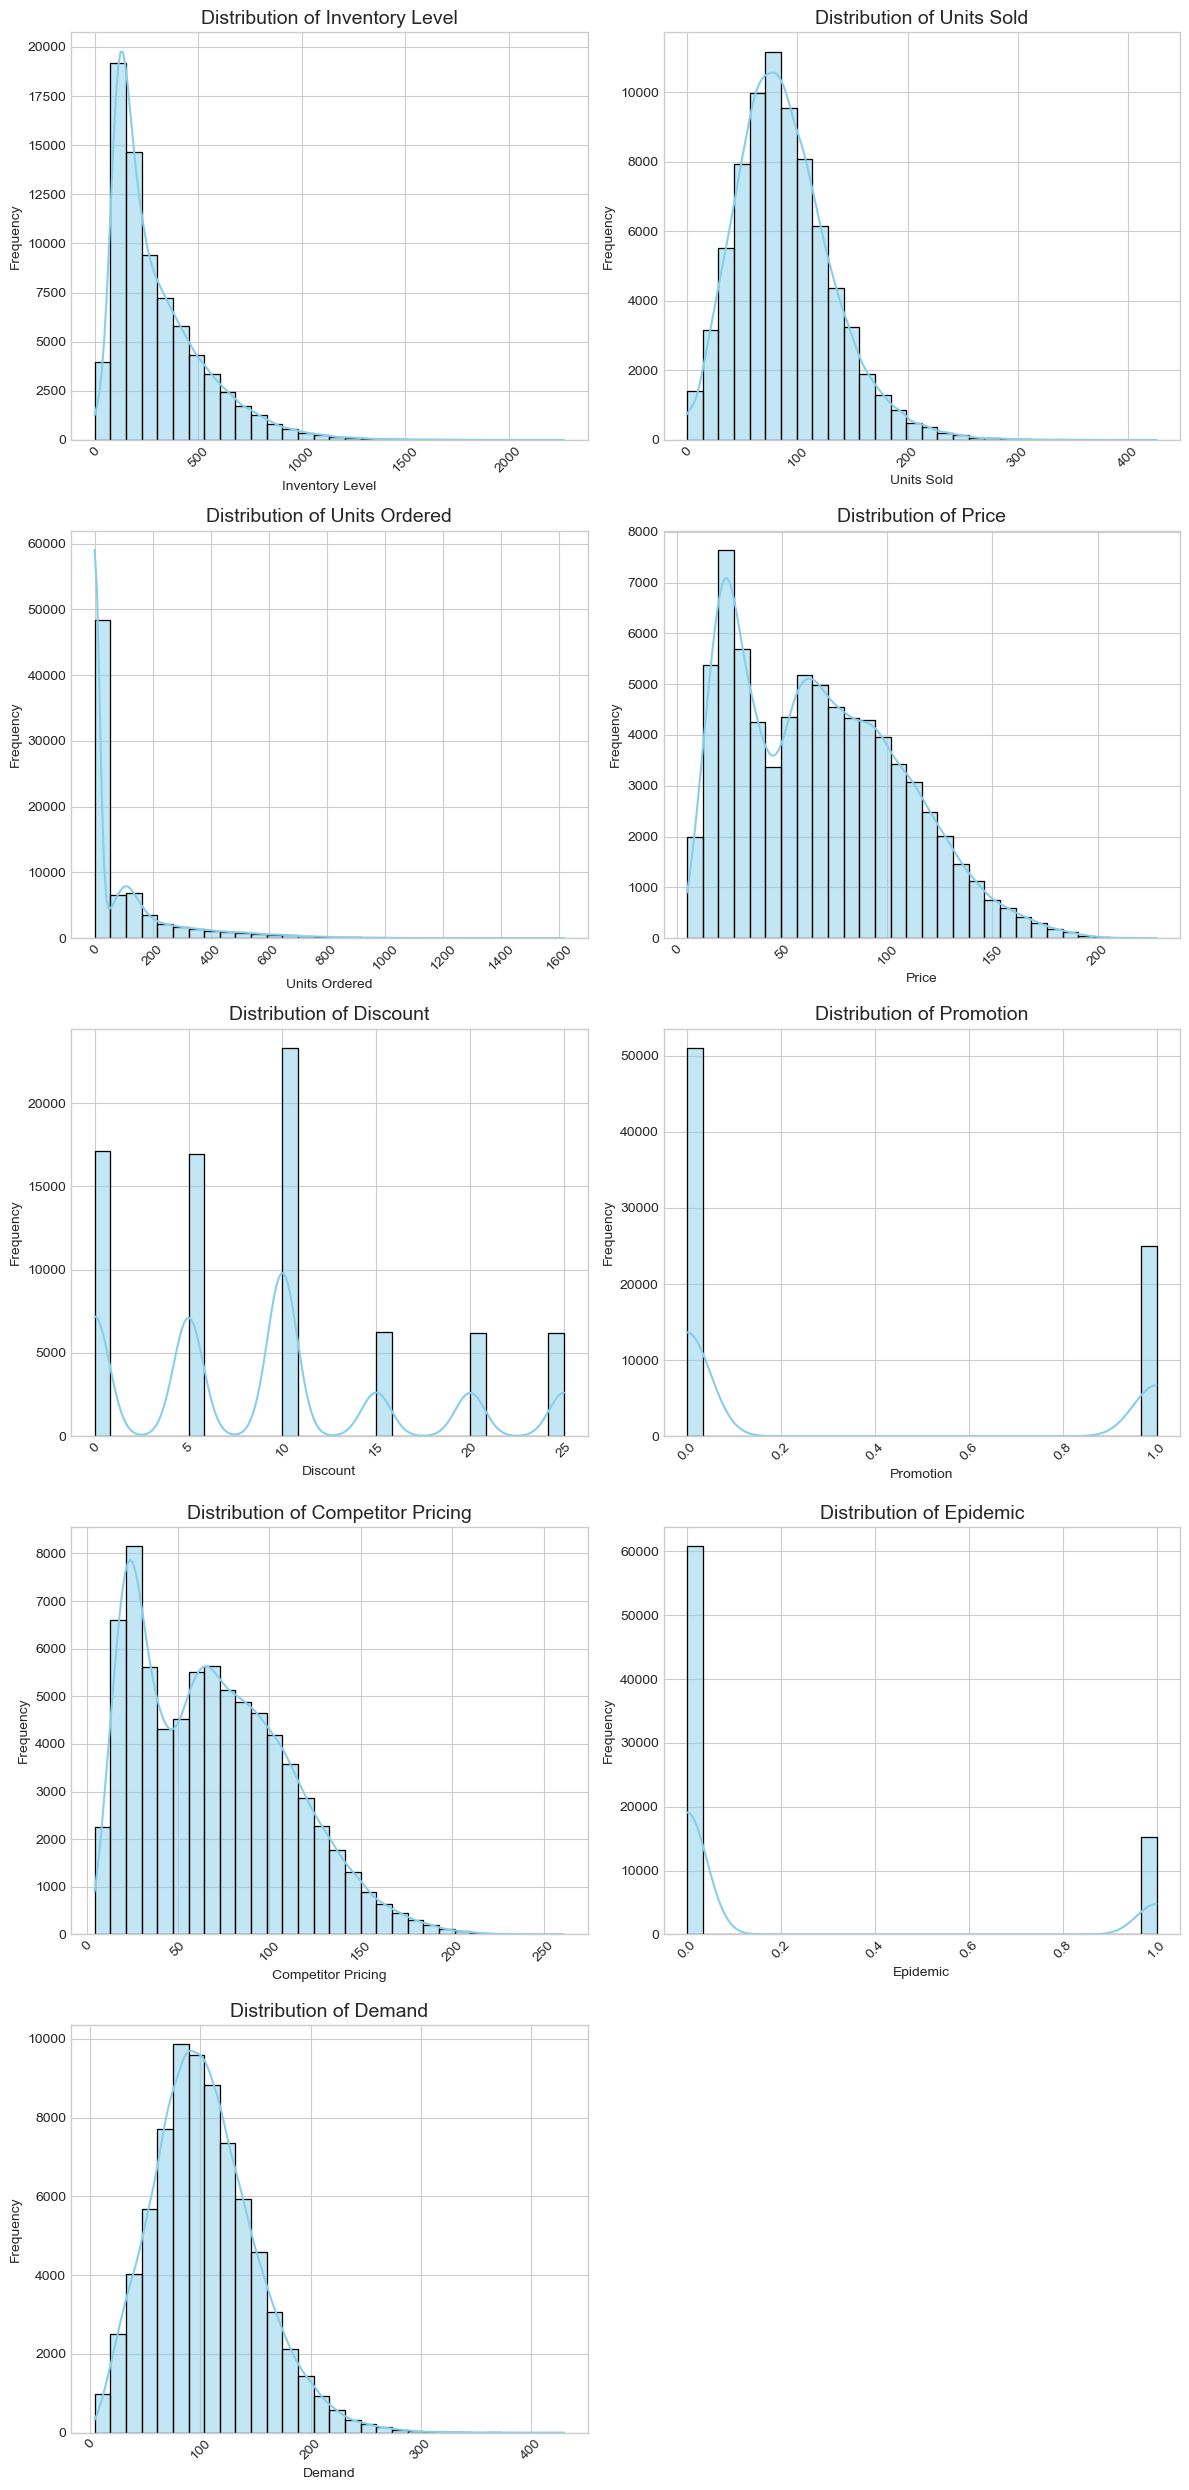

In [ ]:
# Visualize numerical feature distributions

n_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
n_cols = 2
n_rows = math.ceil(len(n_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(n_features):
    sns.histplot(data[feature], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

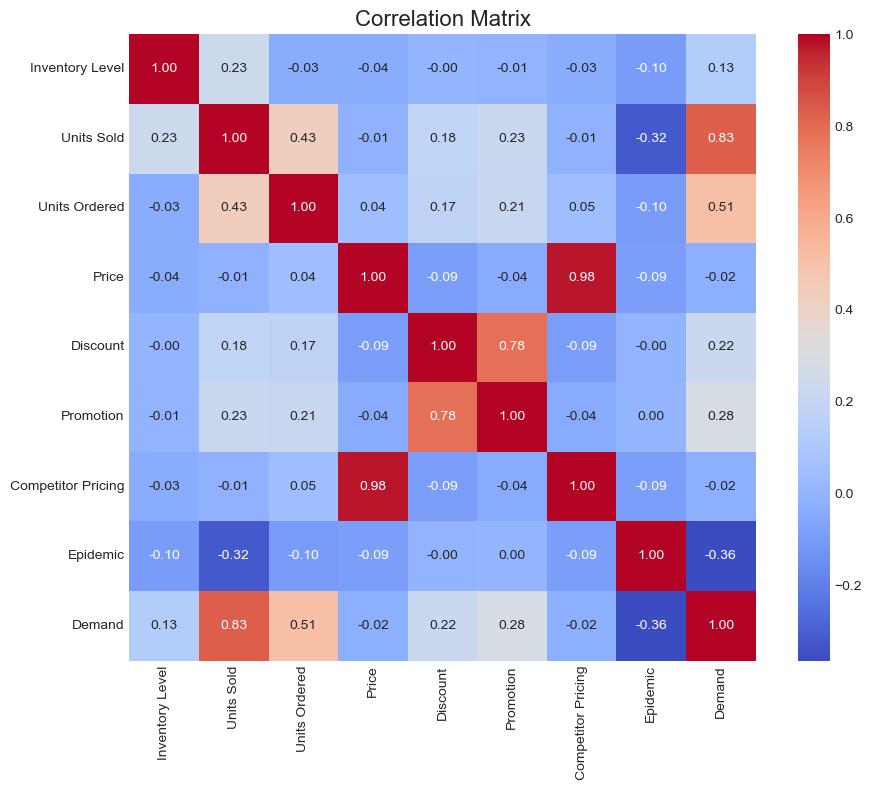

In [ ]:
# Correlation matrix heatmap

corr = data.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

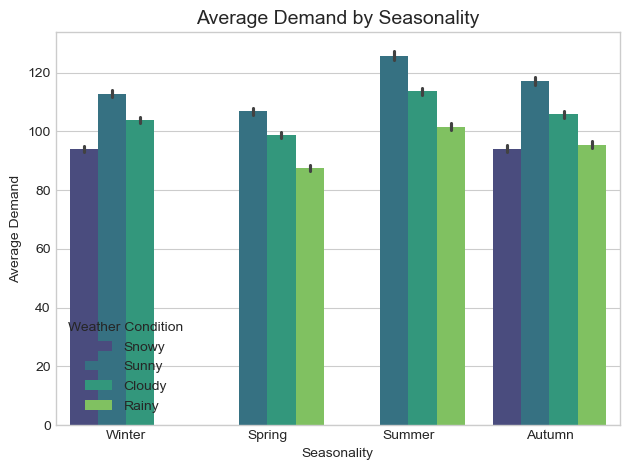

In [ ]:
# Visualize Demand by Seasonality and Weather Condition

sns.barplot(data=data, x='Seasonality', y='Demand', hue='Weather Condition', palette='viridis')
plt.title('Average Demand by Seasonality', fontsize=14)
plt.xlabel('Seasonality')
plt.ylabel('Average Demand')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate and print stockout rate

stockouts = data[data['Demand'] > data['Inventory Level']]
stockout_rate = len(stockouts) / len(data) * 100
print(f'Stockout Rate: {stockout_rate:.2f}%')

Stockout Rate: 13.68%
